In [1]:
import pandas as pd


In [2]:
import talib



In [3]:

# Load CSV
stock_data = pd.read_csv(
    r"C:\Users\THINKPAD\Desktop\10_Academy\Week_1\week_one_project\data\yfinance_data (1)\Data\GOOG.csv", 
    parse_dates=['Date'], 
    index_col='Date'
)

# Check the data
print(stock_data.head())
print(stock_data.info())


               Close      High       Low      Open     Volume
Date                                                         
2009-01-02  7.948608  7.960977  7.557264  7.633949  144961322
2009-01-05  8.115089  8.194003  7.792268  7.940692  196293007
2009-01-06  8.263762  8.430492  8.074027  8.237046  257971329
2009-01-07  7.965677  8.185839  7.885034  8.121770  180453860
2009-01-08  8.044340  8.044340  7.850152  7.873406  144567852
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2009-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3774 non-null   float64
 1   High    3774 non-null   float64
 2   Low     3774 non-null   float64
 3   Open    3774 non-null   float64
 4   Volume  3774 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.9 KB
None


Calculate Technical Indicators with TA-Lib

In [4]:


# Simple Moving Average (20 periods)
stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)

# Exponential Moving Average (20 periods)
stock_data['EMA_20'] = talib.EMA(stock_data['Close'], timeperiod=20)

# Relative Strength Index (RSI)
stock_data['RSI_14'] = talib.RSI(stock_data['Close'], timeperiod=14)

# MACD
stock_data['MACD'], stock_data['MACD_signal'], stock_data['MACD_hist'] = talib.MACD(
    stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

# Bollinger Bands
stock_data['upper'], stock_data['middle'], stock_data['lower'] = talib.BBANDS(
    stock_data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0
)

print(stock_data.tail())


                 Close        High         Low        Open    Volume  \
Date                                                                   
2023-12-22  141.750000  142.276397  141.089511  141.164014  18513500   
2023-12-26  141.849304  142.966658  141.531472  142.008205  11170100   
2023-12-27  140.478683  142.345911  140.092320  141.859236  17288400   
2023-12-28  140.319748  141.303025  139.870824  140.885881  12192500   
2023-12-29  139.972137  140.473710  138.949139  139.723837  14881000   

                SMA_20      EMA_20     RSI_14      MACD  MACD_signal  \
Date                                                                   
2023-12-22  135.009596  135.854576  64.953309  1.412015     0.572046   
2023-12-26  135.246477  136.425503  65.115870  1.706565     0.798950   
2023-12-27  135.386520  136.811520  60.916026  1.808553     1.000870   
2023-12-28  135.628861  137.145637  60.429303  1.855168     1.171730   
2023-12-29  135.976979  137.414827  59.313063  1.842820     1.3

Visualize the Data

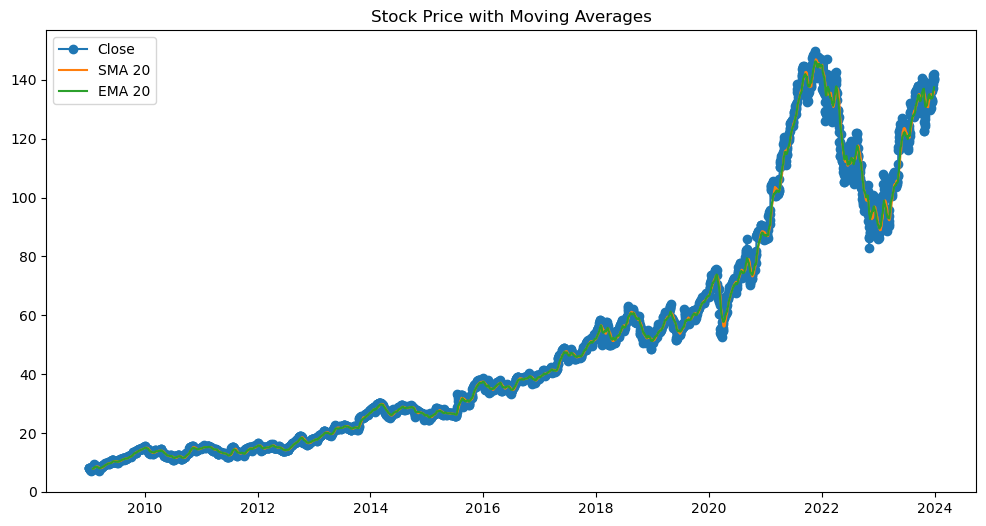

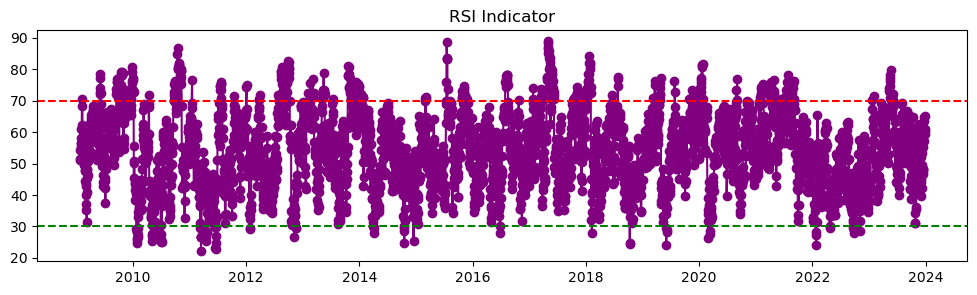

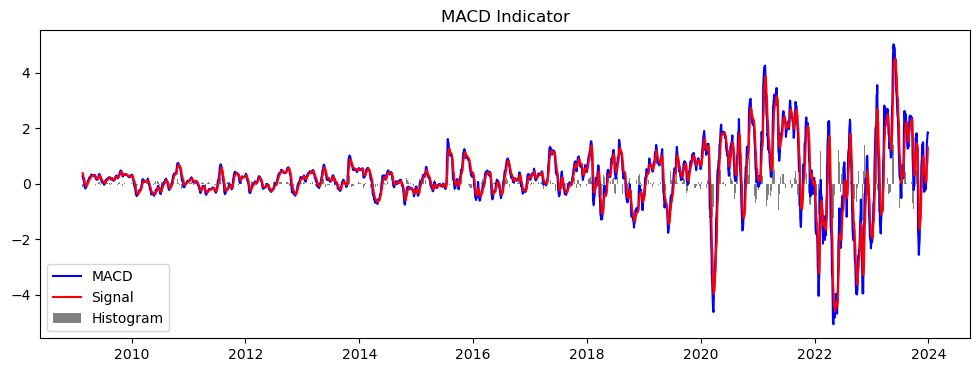

In [5]:
import matplotlib.pyplot as plt

# Price + Moving Averages
plt.figure(figsize=(12,6))
plt.plot(stock_data['Close'], label='Close', marker='o')
plt.plot(stock_data['SMA_20'], label='SMA 20')
plt.plot(stock_data['EMA_20'], label='EMA 20')
plt.title("Stock Price with Moving Averages")
plt.legend()
plt.show()

# RSI
plt.figure(figsize=(12,3))
plt.plot(stock_data['RSI_14'], label='RSI 14', color='purple', marker='o')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title("RSI Indicator")
plt.show()

# MACD
plt.figure(figsize=(12,4))
plt.plot(stock_data['MACD'], label='MACD', color='blue')
plt.plot(stock_data['MACD_signal'], label='Signal', color='red')
plt.bar(stock_data.index, stock_data['MACD_hist'], label='Histogram', color='gray')
plt.title("MACD Indicator")
plt.legend()
plt.show()
